In [1]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [2]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

# konwersja RGB na L

L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [3]:
def konwertuj_L_tablice(im, w1, w2, w3):
    r, g, b = im.split()
    r_T = np.array(r)
    g_T = np.array(g)
    b_T = np.array(b)
    szary = w1 * r_T + w2 * g_T + w3 * b_T
    szary = np.clip(szary, 0, 255).astype(np.uint8)
    return Image.fromarray(szary) 
  
def konwertuj_L_kanaly(im, w1, w2, w3):
    r, g, b = im.split()
    r_n = r.point(lambda i : i*w1)
    g_n = g.point(lambda i : i*w2)
    b_n = b.point(lambda i : i*w3)  
    
    # Sumowanie kanałów
    szary_n = ImageChops.add(r_n, g_n)
    szary_n = ImageChops.add(szary_n, b_n)
    return szary_n  

im = Image.open('mgla.jpg') # obraz RGB

w1 = 0.299
w2 = 0.587
w3 = 0.114

szary = im.convert('L')
szary_t =  konwertuj_L_tablice(im, w1, w2, w3)
szary_k =  konwertuj_L_kanaly(im, w1, w2, w3)

dif1 = ImageChops.difference(szary, szary_t)
statystyki(dif1)

print('---------------------------------------------------------------')


dif2 = ImageChops.difference(szary, szary_k)
statystyki(dif2)



extrema  [(0, 1)]
count  [494214]
mean  [0.4668969312888749]
median  [0]
stddev  [0.49890298339647815]
---------------------------------------------------------------
extrema  [(0, 1)]
count  [494214]
mean  [0.2784482026004929]
median  [0]
stddev  [0.44823520730644056]


<!-- konwersja RGB na L -->

<!-- L = R * 299/1000 + G * 587/1000 + B * 114/1000 -->

RGB


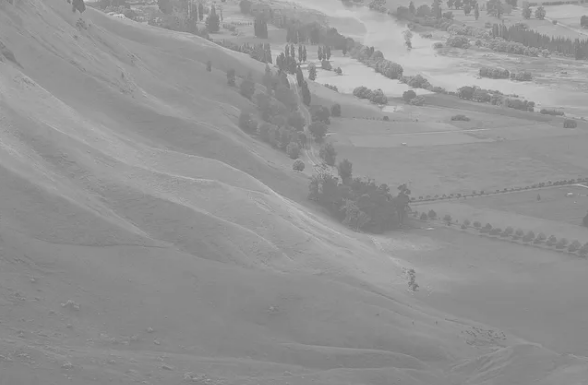

In [4]:
widok = Image.open('widok.png')
print(widok.mode)
widok

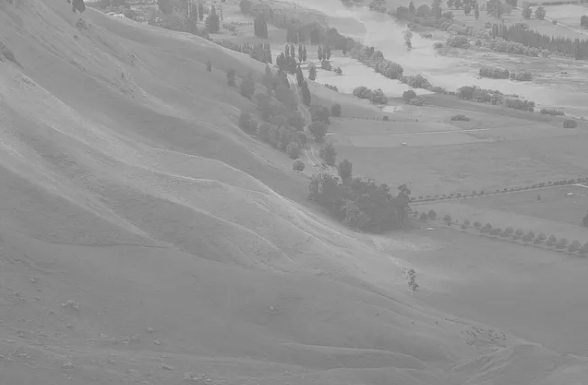

In [5]:
widok_r, g, b = widok.split()
widok_r 

L


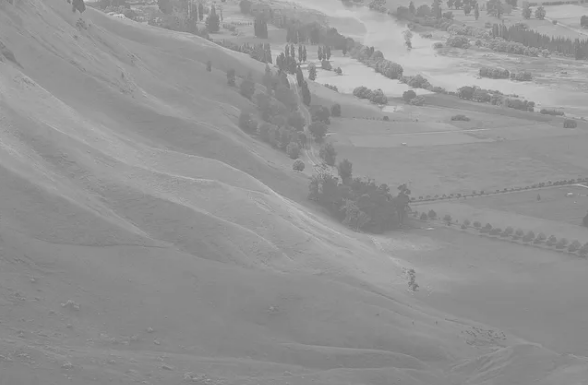

In [6]:
widok_sz = widok.convert('L')
print(widok_sz.mode)
widok_sz

In [7]:
statystyki(ImageChops.difference(widok_r, widok_sz))



extrema  [(0, 1)]
count  [226380]
mean  [0.008861206820390493]
median  [0]
stddev  [0.0937159849442813]


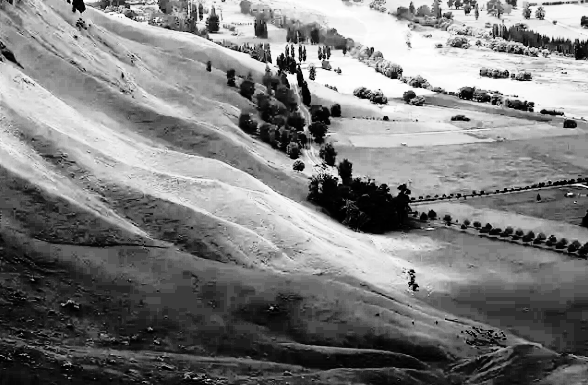

In [8]:
widok_equalized = ImageOps.equalize(widok_sz, mask = None)
widok_equalized 

In [9]:
im = Image.open('brain1.png')

print(im.mode)
print(im.size)
statystyki(im)

RGBA
(352, 324)
extrema  [(0, 254), (0, 254), (0, 254), (255, 255)]
count  [114048, 114048, 114048, 114048]
mean  [63.95809659090909, 63.95809659090909, 63.95809659090909, 255.0]
median  [68, 68, 68, 255]
stddev  [44.368672066598435, 44.368672066598435, 44.368672066598435, 0.0]


In [10]:
r, g, b, a = im.split()
szary = r
print(szary.mode)
print(szary.size)
statystyki(szary)

L
(352, 324)
extrema  [(0, 254)]
count  [114048]
mean  [63.95809659090909]
median  [68]
stddev  [44.368672066598435]


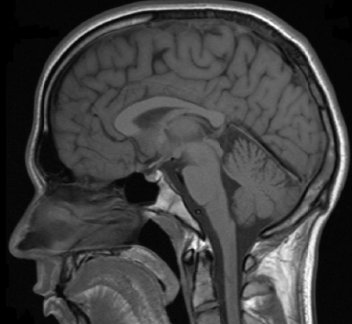

In [11]:
szary

<BarContainer object of 256 artists>

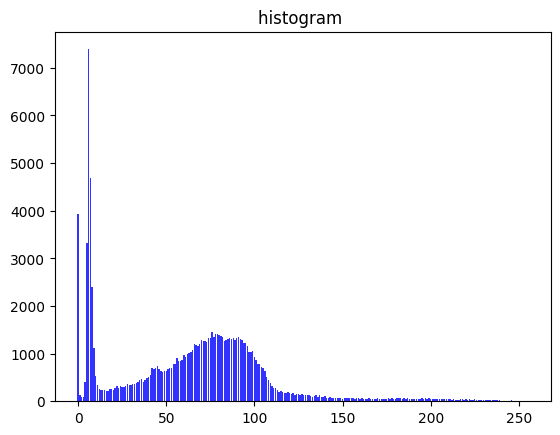

In [12]:
hist = szary.histogram()
plt.title("histogram ")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

In [13]:
im_equalized1 = ImageOps.equalize(szary, mask = None)
im_equalized1
print(im_equalized1.mode)

L


<BarContainer object of 256 artists>

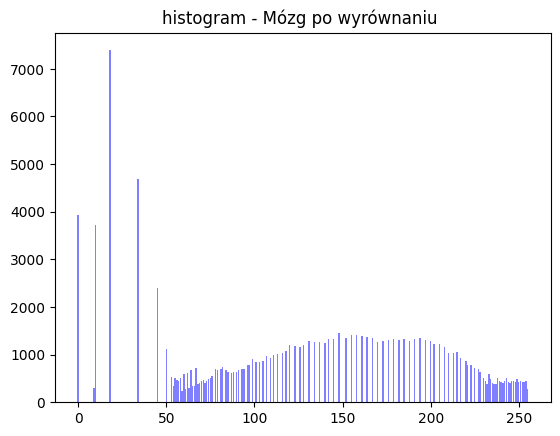

In [14]:
hist = im_equalized1.histogram()

plt.title("histogram - Mózg po wyrównaniu ")
plt.bar(range(256), hist[:], color='b', alpha=0.5)

# Wyrównanie z maską

(352, 324) L
(352, 324)


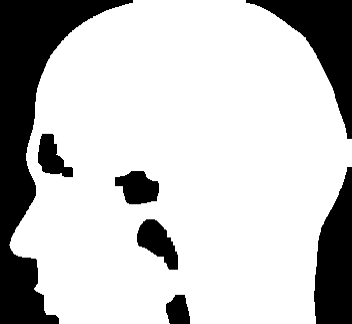

In [15]:
maska = Image.open('maska_brain1.png') 
print(maska.size, maska.mode)
print(szary.size)
maska

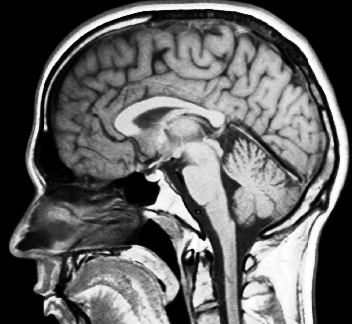

In [16]:
im_equalized2 = ImageOps.equalize(szary, mask = maska)
im_equalized2

<BarContainer object of 256 artists>

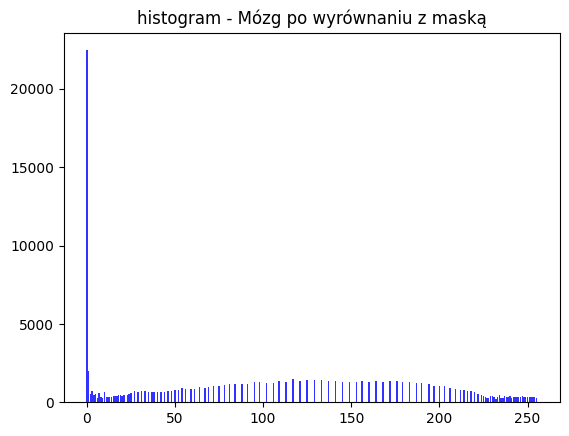

In [17]:
hist = im_equalized2.histogram()
plt.title("histogram - Mózg po wyrównaniu z maską")
plt.bar(range(256), hist[:], color='b', alpha=0.8)

In [18]:
statystyki(szary)

extrema  [(0, 254)]
count  [114048]
mean  [63.95809659090909]
median  [68]
stddev  [44.368672066598435]


In [19]:
statystyki(im_equalized1)

extrema  [(0, 255)]
count  [114048]
mean  [125.68303696689114]
median  [126]
stddev  [74.89491908585093]


In [20]:
statystyki(im_equalized2)

extrema  [(0, 255)]
count  [114048]
mean  [97.9533003647587]
median  [88]
stddev  [83.2716813860248]


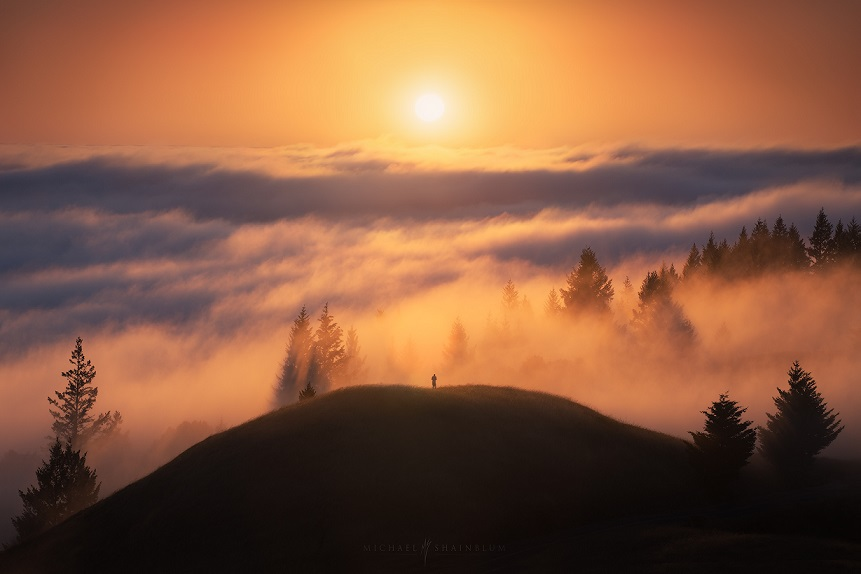

In [21]:
im = Image.open('mgla.jpg') # obraz kolorowy
im


extrema  [(5, 255), (0, 244), (0, 240)]
count  [494214, 494214, 494214]
mean  [136.95908452613645, 90.40623495085126, 63.51917388014099]
median  [149, 91, 73]
stddev  [83.18721585413134, 56.8894532947344, 35.732913863973245]


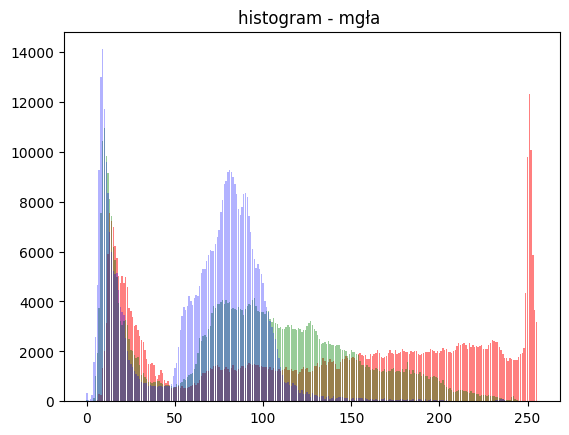

In [22]:
statystyki(im)
hist = im.histogram()
plt.title("histogram - mgła ")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

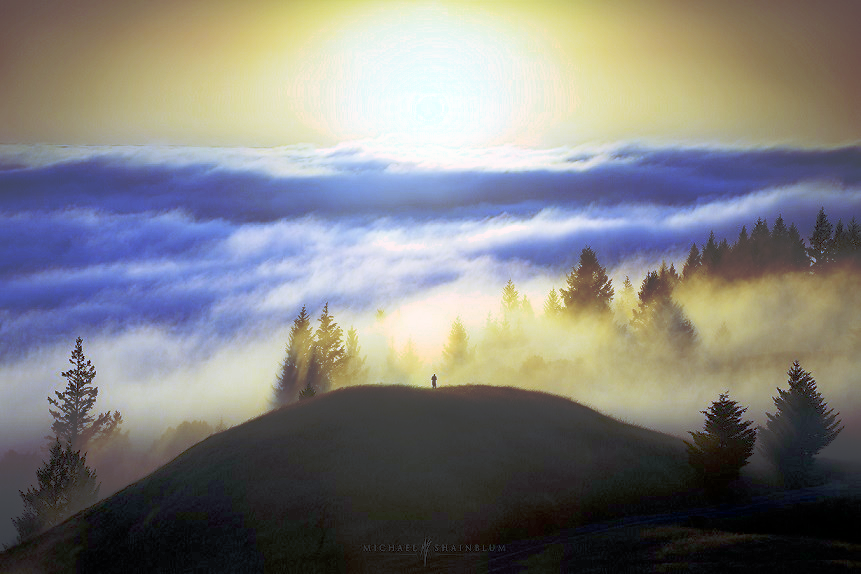

In [23]:
r, g, b = im.split()
# wyrównanie każdego kanału oddzielnie
r_eq = ImageOps.equalize(r)
g_eq = ImageOps.equalize(g)
b_eq = ImageOps.equalize(b)
im1 = Image.merge('RGB', (r_eq, g_eq, b_eq))
im1

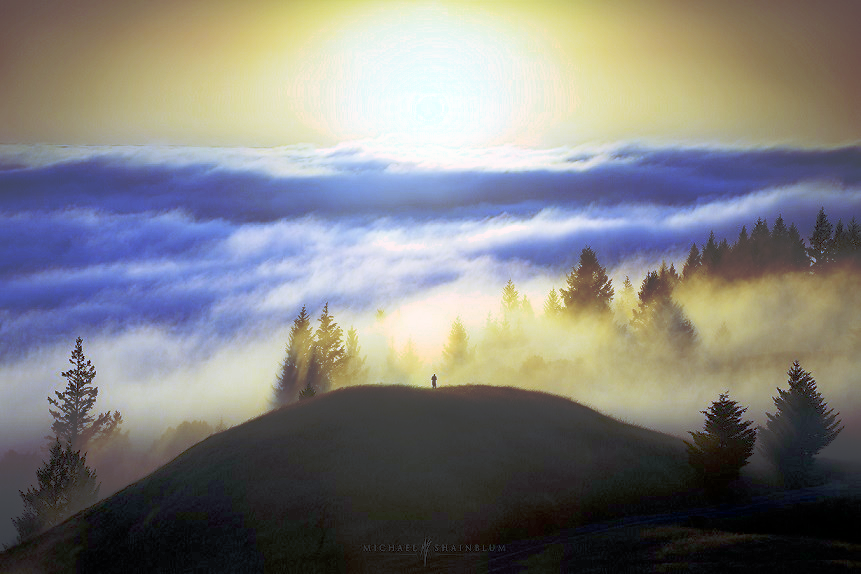

In [24]:
# wyrównaie obrazu RGB
im_equalized1 = ImageOps.equalize(im, mask=None)
im_equalized1

extrema  [(0, 255), (0, 255), (0, 255)]
count  [494214, 494214, 494214]
mean  [127.56359390871161, 126.69678115148498, 125.91618205878426]
median  [128, 126, 125]
stddev  [74.04443163783701, 74.05644815560801, 73.78911379717243]


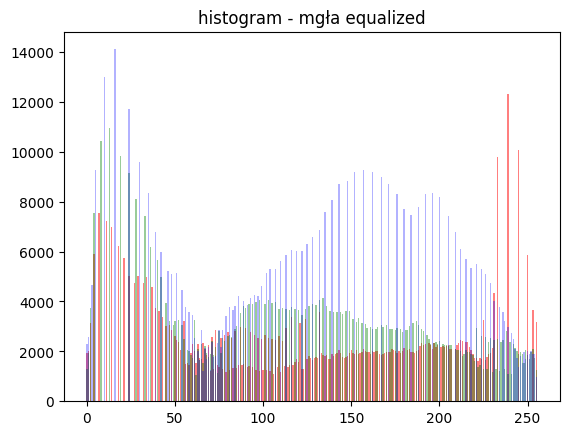

In [25]:
statystyki(im_equalized1)
hist = im_equalized1.histogram()
plt.title("histogram - mgła equalized")
plt.bar(range(256), hist[:256], color='r', alpha=0.5)
plt.bar(range(256), hist[256:2 * 256], color='g', alpha=0.4)
plt.bar(range(256), hist[2 * 256:], color='b', alpha=0.3)
plt.show()

In [26]:
# dowód, że ImageOps.equalize(im) na obrazie RGB działa tak samo jak wyrównanie kazdego kanału oddzielnie i scalenie
diff=ImageChops.difference(im_equalized1, im1)
statystyki(diff)

extrema  [(0, 0), (0, 0), (0, 0)]
count  [494214, 494214, 494214]
mean  [0.0, 0.0, 0.0]
median  [0, 0, 0]
stddev  [0.0, 0.0, 0.0]


1. Wyszukaj obraz w formacie jpg lub png, który jest obrazem medycznym w odcieniach szarości. Sprawdź tryb i przekonwertuj do trybu ‘L’

In [27]:
im = Image.open('rentgen.png')
t_im = np.array(im)
r, g, b = im.split()
szary = r
print(f'im.mode: {im.mode}')
im_L = im.convert('L')
print(f"im_L.convert('L').mode: {im_L.mode}")

im.mode: RGB
im_L.convert('L').mode: L


2. Wypisz statystyki tego obrazu i skomentuj słownie te statystyki. Wyświetl histogram (zrzut ekranu wklej do raportu) i skomentuj słownie odnosząc się również do statystyk.

In [28]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe


print('===== obraz oryginal =====')
statystyki(im)
print('===== obraz convert L =====')
statystyki(im_L)

===== obraz oryginal =====
extrema  [(19, 242), (19, 242), (19, 242)]
count  [861120, 861120, 861120]
mean  [82.58639330174657, 82.58639330174657, 82.58639330174657]
median  [64, 64, 64]
stddev  [54.37005925188605, 54.37005925188605, 54.37005925188605]
===== obraz convert L =====
extrema  [(19, 242)]
count  [861120]
mean  [82.58639330174657]
median  [64]
stddev  [54.37005925188605]


Obraz nie korzysta z pełnego zakresu odcieni szarości, minimalna wartość to 19, a maksymalna to 242. Średnia wartość pikseli wynosi 82.59 co mówi, że obraz jest stosunkowo ciemny. Mediana wynosi 64, co oznacza, że połowa pikseli ma wartość poniżej 64. Odchylenie standardowe wynosi 54.37, co wskazuje na umiarkowaną różnorodność wartości pikseli w obrazie.

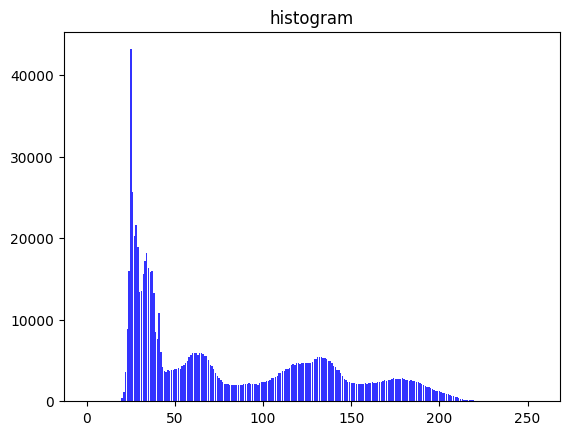

In [29]:
hist = im_L.histogram()
plt.title("histogram")
plt.bar(range(256), hist[:], color='b', alpha=0.8)
plt.savefig('hist.png')
plt.show()

3. Napisz program histogram_norm(obraz), który na wyjściu daje histogram znormalizowany obrazu. Zastosuj tę funkcję do obrazu i przedstaw histogram w postaci diagramu plt a następnie wklej do raportu.

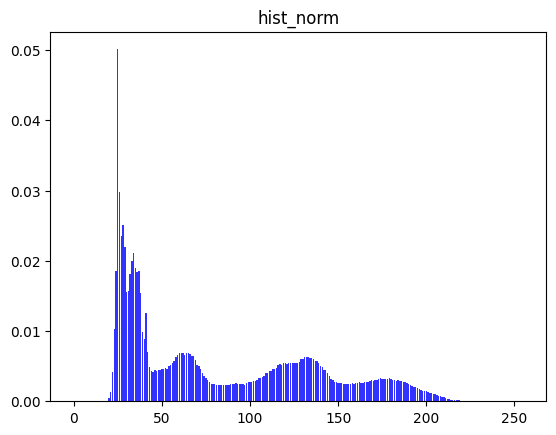

In [30]:
def histogram_norm(obraz):
    hist = obraz.histogram()
    pixels = sum(hist)
    hist_norm = [i / pixels for i in hist]
    plt.title("hist_norm")
    plt.bar(range(256), hist_norm, color='b', alpha=0.8)
    plt.savefig('hist_norm.png')
    plt.show()


histogram_norm(im_L)

4. Napisz program histogram_cumul(obraz), który na wyjściu daje histogram skumulowany obrazu. Zastosuj tę funkcję do obrazu i przedstaw histogram w postaci diagramu plt a następnie wklej do raportu.

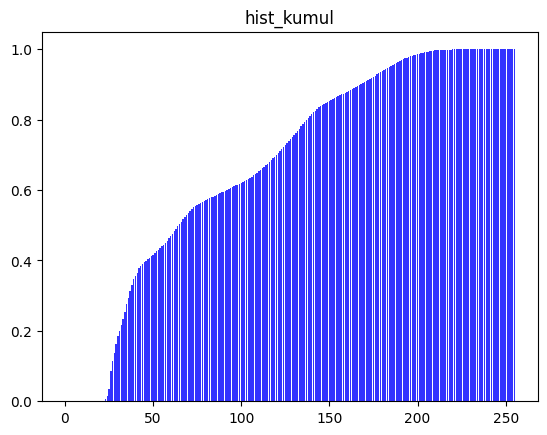

In [31]:
def histogram_kumul(obraz):
    hist = obraz.histogram()
    pixels = sum(hist)
    hist_norm = [i / pixels for i in hist]
    hist_kumul = [sum(hist_norm[:i]) for i in range(256)]
    plt.title("hist_kumul")
    plt.bar(range(256), hist_kumul, color='b', alpha=0.8)
    plt.savefig('hist_kumul.png')
    plt.show()


histogram_kumul(im_L)

5. Napisz program histogram_equalization(obraz), który na wyjściu daje obraz powstały po wyrównaniu histogramu obrazu. Zastosuj tę funkcję do obrazu obraz i zapisz jako obraz equalized.png

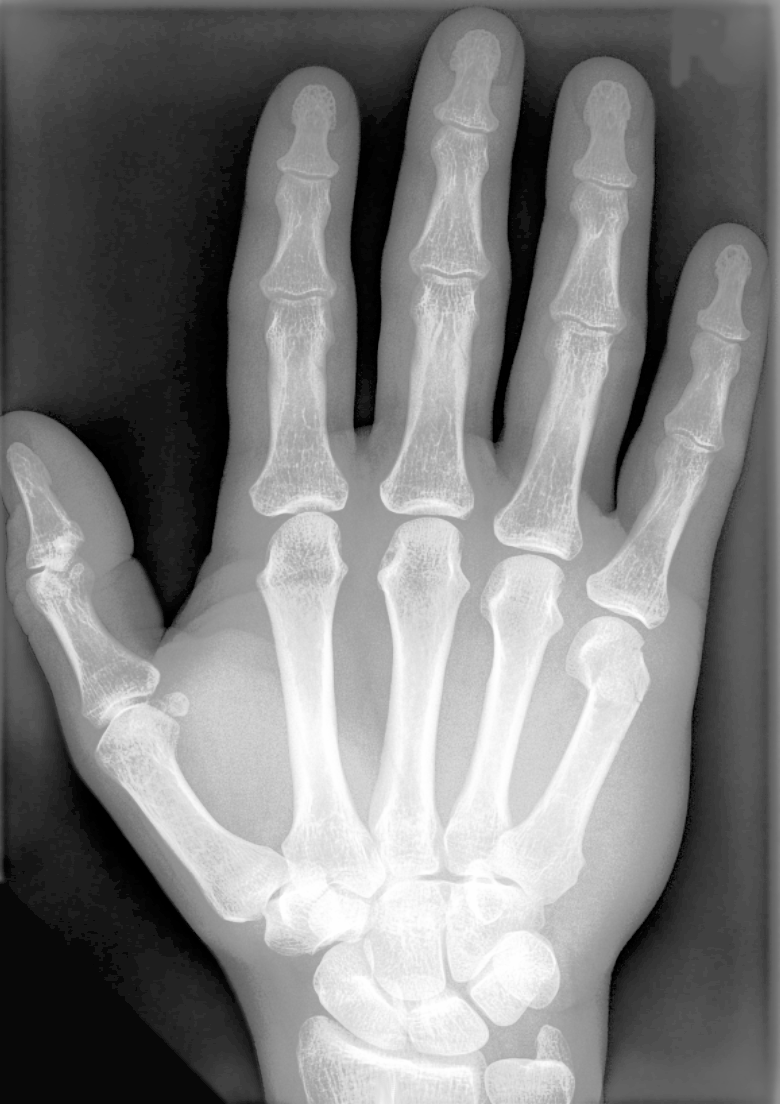

In [32]:
def histogram_equalization(obraz):
    hist = obraz.histogram()
    pixels = sum(hist)
    hist_norm = [i / pixels for i in hist]
    hist_kumul = [sum(hist_norm[:i]) for i in range(256)]
    hist_equal = [int(255*hist_kumul[p]) for p in range(256)]
    t_obraz = np.array(obraz)
    t_eq = np.zeros(t_obraz.shape, dtype=np.uint8)
    for i in range(256):
        t_eq[t_obraz == i] = hist_equal[i]

    return Image.fromarray(t_eq)


equalized = histogram_equalization(im_L)
equalized.save('equalized.png')
equalized

6. Zastosuj metodę ImageOps.equalize do obrazu obraz, zapisz obraz jako equalized1.png. Następnie\
    6.1 porównaj obrazy z pkt 5. i 6. i skomentuj\
    6.2 przedstaw histogramy na jednym diagramie plt, wklej do raportu i
    skomentuj różnice\
    6.3 pobierz statystyki obu obrazów i skomentuj różnice

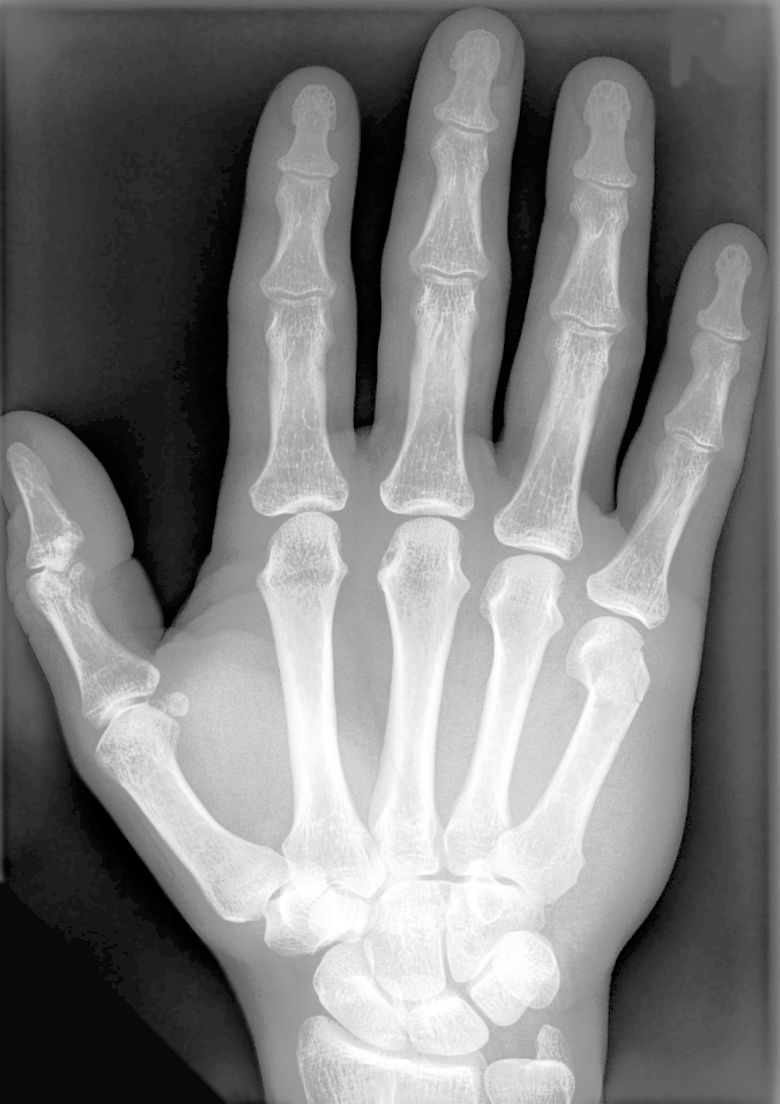

In [33]:
equalized1 = ImageOps.equalize(im_L)
equalized1.save('equalized1.png')
equalized1

Obrazy są do siebie bardzo podobne, gołym okieniem trudno zauważyć różnice.

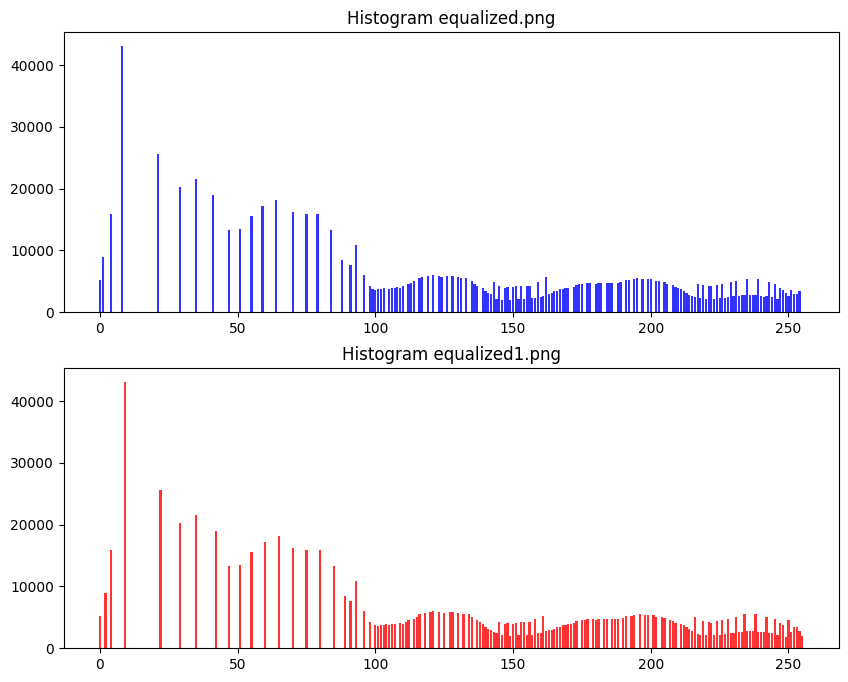

In [34]:
hist_eq = equalized.histogram()
hist_eq1 = equalized1.histogram()
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title("Histogram equalized.png")
plt.bar(range(256), hist_eq[:], color='b', alpha=0.8)
plt.subplot(2, 1, 2)
plt.title("Histogram equalized1.png")
plt.bar(range(256), hist_eq1[:], color='r', alpha=0.8)
plt.savefig('hist_eq_vs_eq1.png')
plt.show()

Histogramy są do siebie bardzo podobne, widać bardzo niewielkie różnice. 

In [35]:
print('===== equalized.png =====')
statystyki(equalized)

print('===== equalized1.png =====')
statystyki(equalized1)

===== equalized.png =====
extrema  [(0, 254)]
count  [861120]
mean  [125.5111436269045]
median  [126]
stddev  [74.7452035962131]
===== equalized1.png =====
extrema  [(0, 255)]
count  [861120]
mean  [126.0698160535117]
median  [127]
stddev  [74.7701200991852]


Statystyki obu obrazów są do siebie bardzo zbliżone. Różnica na ekstremach wynosi 1, wartość średnia rózni się o 0.5, mediana o 1, a odchylenie standardowe o 0.025. Co potwierdza, że obrazy są bardzo podobne, niemalże identyczne.